In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from os.path import join as p_join

import seaborn as sns

##################################
## GLOBAL SETTINGS ###############
##################################
plt.rcParams["figure.figsize"] = (12,8)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
CLASSES = [0, 1, 2, 3]


###################################
####     SKIT-LEARN DEPS       ####
###################################
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm

In [2]:
def seed_all(seed=42):

    random.seed(seed)
    np.random.seed(seed)
    print("[ Using Seed : ", seed, " ]")

####################################
#####   SEED ALL EXPERIMENTS   #####
####################################
seed_all()

[ Using Seed :  42  ]


In [3]:
import sys
sys.path.append("../../") # Adds higher directory to python modules path.
from utils import utils

In [4]:
def plot_conf_matrix(model, X, Y):
    predictions = model.predict(X)
    cm = confusion_matrix(Y, predictions, labels=CLASSES)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=CLASSES)
    disp.plot()
    plt.show()

### Prepare data and split it!

In [8]:
data_path = p_join('..', '..', 'data_2')
FOLDERS = [p_join(os.path.abspath(data_path), item) for item in os.listdir(data_path) if 'L=10.6' in item]
X, Y = utils.create_dataset(FOLDERS)
X = utils.normalize_data(X)

100%|███████████████████████████████████████████| 16/16 [00:01<00:00,  8.47it/s]


In [13]:
### Train SVC
X_train, X_test, y_train, y_test = train_test_split(
        X, Y, random_state=0)
model = svm.SVC(C=1000, n_jobs=-1)
model.fit(X_train, y_train)
pass

### Plot conf Matrix

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


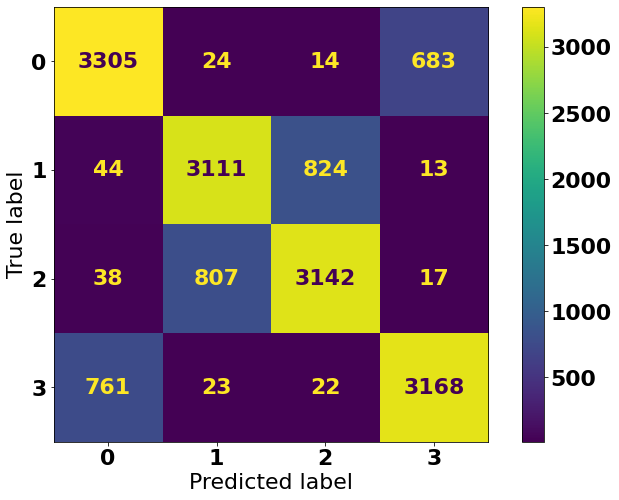

In [16]:
plot_conf_matrix(model, X_test, y_test)
pass

In [17]:
# Calc Accuracy:
predictions = model.predict(X_test)
acc = (predictions == y_test).sum()/len(predictions)
acc

0.7955738934733684

In [19]:
model = svm.SVC(C=2000)
model.fit(X_train, y_train)
pass

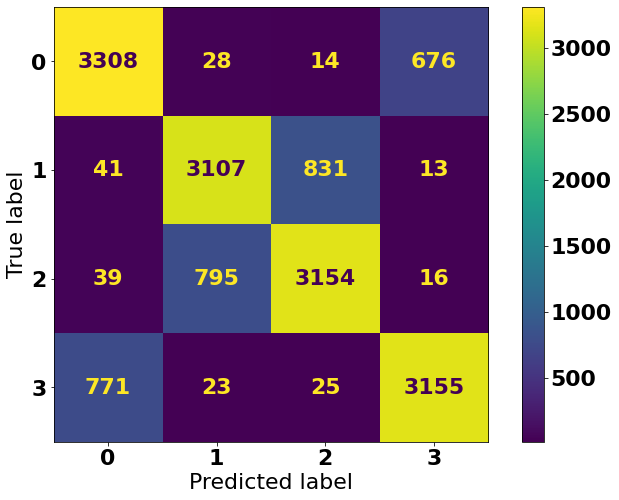

In [20]:
plot_conf_matrix(model, X_test, y_test)
pass

In [21]:
predictions = model.predict(X_test)
acc = (predictions == y_test).sum()/len(predictions)
acc

0.7954488622155539

### Plot Coufusion Mlp models test

In [7]:
import os
import sys
from os.path import join as p_join

sys.path.append("../../") # Adds higher directory to python modules path.
from utils import utils

In [16]:
import torch
from utils import dl_models
import pandas as pd
import numpy as np

In [13]:
def get_loaderes(l='1.6', add_axis=False):
    utils.seed_all()
    data_path = p_join('..', '..', 'data_2')
    FOLDERS = [p_join(os.path.abspath(data_path), item) for item in os.listdir(data_path) if l in item]
    X, Y = utils.create_dataset(FOLDERS)
    X = utils.normalize_data(X)
    if add_axis:
        X = np.expand_dims(X, axis=1)
    return utils.create_dataloaders(X, Y)

In [14]:
def multy_cross_test(model, ckpts_paths, add_axis=False):
    L = ['1.6', '6.6', '7.6', '8.6', '10.6']

    data = {p: [] for p in ckpts_paths}

    for ckpt_path in ckpts_paths:
        print(ckpt_path)
        ckpt = torch.load(p_join('..', 'dl', ckpt_path, 'model_best.ckpt'))
        model.load_state_dict(ckpt)
        for l in L:
            _, loader = get_loaderes(l, add_axis)
            acc = utils.test_model(model, loader, device='cpu')
            data[ckpt_path].append(acc)
            
    df = pd.DataFrame.from_dict(data, orient='index', columns=[f'L={l}' for l in L])
    return df

In [5]:
model = dl_models.MlpNeLight(in_features=16)
ckpts_paths = ['mlp_ckpts_L_1_6', 'mlp_ckpts_L_6_6',
               'mlp_ckpts_L_7_6', 'mlp_ckpts_L_8_6', 'mlp_ckpts_L_10_6']
df = multy_cross_test(model, ckpts_paths)

mlp_ckpts_L_1_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 274.39it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 273.64it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 268.47it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 261.22it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 261.56it/s]


mlp_ckpts_L_6_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 268.97it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 256.53it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 220.03it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 265.99it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 268.73it/s]


mlp_ckpts_L_7_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 265.88it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 260.38it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 268.59it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 273.74it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 220.54it/s]


mlp_ckpts_L_8_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 256.52it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 280.55it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 275.92it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 282.34it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 293.23it/s]


mlp_ckpts_L_10_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 268.40it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 294.28it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 268.84it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 231.05it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 288.73it/s]


In [6]:
df

,L=1.6,L=6.6,L=7.6,L=8.6,L=10.6
mlp_ckpts_L_1_6,50.894741,21.544112,21.927014,31.405798,30.022662
mlp_ckpts_L_6_6,15.667735,66.015472,40.947097,26.334297,25.529421
mlp_ckpts_L_7_6,21.372197,39.282644,70.461827,33.632883,24.349457
mlp_ckpts_L_8_6,25.490349,31.734000,39.290459,73.337501,32.359147
mlp_ckpts_L_10_6,36.125654,24.404157,27.209502,33.679769,81.323748


### Plot Coufusion Cnn + Mlp models test

In [17]:
model = dl_models.ConvMlpNet()
ckpts_paths = ['cnn_ckpts_L_1_6', 'cnn_ckpts_L_6_6',
               'cnn_ckpts_L_7_6', 'cnn_ckpts_L_8_6', 'cnn_ckpts_L_10_6']
df = multy_cross_test(model, ckpts_paths, add_axis=True)

cnn_ckpts_L_1_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 153.70it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 168.44it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 159.79it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 166.86it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 169.30it/s]


cnn_ckpts_L_6_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 152.90it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 146.55it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 170.08it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 174.79it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 153.04it/s]


cnn_ckpts_L_7_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 161.71it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 165.20it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 163.11it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 159.20it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 161.51it/s]


cnn_ckpts_L_8_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 162.42it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 155.80it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 163.29it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 165.89it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 142.56it/s]


cnn_ckpts_L_10_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 151.78it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 161.70it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 164.71it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 151.84it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 168.79it/s]


In [18]:
df

,L=1.6,L=6.6,L=7.6,L=8.6,L=10.6
cnn_ckpts_L_1_6,50.910370,23.325779,25.935766,26.982887,25.130890
cnn_ckpts_L_6_6,21.833242,67.390795,39.110729,30.319606,26.857857
cnn_ckpts_L_7_6,25.795108,37.969837,70.805658,34.117371,26.248339
cnn_ckpts_L_8_6,29.749160,30.100805,36.172540,73.806361,33.203094
cnn_ckpts_L_10_6,28.795812,27.006330,28.647339,34.375244,79.831210


In [ ]:
### Add SVC Plot Coufusion 